# i. Perkenalan

**Nama** : Alfarabi

**Dataset** : [Health care](https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data)

**Hugging Face** : [Hugging Face Health Care Predict](https://huggingface.co/spaces/Alfarabi58/Health_Care_Predict)

**Problem Statement** : Sistem kesehatan modern menghasilkan sejumlah besar data yang berharga, mulai dari rekam medis elektronik hingga data asuransi dan biaya pengobatan. Data kesehatan ini mengandung wawasan yang penting untuk mengembangkan solusi yang dapat meningkatkan layanan kesehatan, mengoptimalkan biaya, dan meningkatkan hasil pasien. Oleh karena itu, analisis data kesehatan menjadi semakin penting dalam membantu mengidentifikasi tren kesehatan, mengelola risiko, dan mendukung pengambilan keputusan di industri kesehatan.

**Objective** : Tujuan proyek ini adalah untuk mengembangkan model machine learning yang dapat memprediksi hasil tes medis (test results) berdasarkan informasi pasien yang tersedia dalam dataset kesehatan. 

# ii. Import Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import phik
from scipy.stats import skew

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting data
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix

# Model definition
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Hyperparameter
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import kfold
from sklearn.model_selection import StratifiedKFold

# Model Saving
import pickle

# Warning
import warnings 
warnings.filterwarnings("ignore")

# iii. Data Loading

Data yang diambil merupakan dataset credit card yang akan di evaluasi dengan menggunakan **Logistic Regression**, **SVM**, **KNN**, **Random Forest**, dan **Ada Boost**.

In [2]:
# Load dataset
df_ori = pd.read_csv('healthcare_dataset.csv')

# Duplicate dataset
df = df_ori.copy()

# Show 5 data
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


Pertama saya akan melakukan pengecekan informasi pada dataframe.

In [3]:
# Cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

Informasi yang didapatkan dari data diatas adalah:  
- 10000  entries
- 15 columns

### Data Cleaning

Saya akan melakukan data cleaning terlebih dulu sebelum mengolah data.

Pertama saya akan mengubah huruf besar menjadi huruf kecil dan menghapus spasi menjadi ( _ ) pada feature, agar mempermudah pengetikan pada pengolahan data.

In [4]:
# Mengubah nama kolom menjadi huruf kecil dan mengganti spasi dengan underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Menampilkan lima baris pertama dari DataFrame setelah modifikasi nama kolom
df.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


Lalu saya akan mengubah tipe data pada date_of_admission dan discharge_date yang sebelumnya object menjadi datetime.

In [5]:
# Mengubah kolom 'date_of_admission' menjadi tipe data datetime
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])

# Mengubah kolom 'discharge_date' menjadi tipe data datetime
df['discharge_date'] = pd.to_datetime(df['discharge_date'])


Kemudian saya membuat kolom length_of_stay yang bertujuan untuk menghitung tanggal masuk dan tanggal keluar rumah sakit dalam hitungan hari.

In [6]:
# Menghitung panjang tinggal pasien (length of stay) dengan mengurangi tanggal discharge dari tanggal admission
df['length_of_stay'] = (df['discharge_date'] - df['date_of_admission']).dt.days

Selanjutnya saya mengecek jumlah unique value pada kolom yang bertujuan untuk memilih kolom yang tidak akan saya gunakan.

In [7]:
# Cek jumlah unique value pada data
df.nunique()

name                   9378
age                      68
gender                    2
blood_type                8
medical_condition         6
date_of_admission      1815
doctor                 9416
hospital               8639
insurance_provider        5
billing_amount        10000
room_number             400
admission_type            3
discharge_date         1834
medication                5
test_results              3
length_of_stay           30
dtype: int64

Lalu setelah memilih kolom yang tidak saya gunakan, saya akan menghapusnya.

In [8]:
# Menghapus beberapa kolom dari DataFrame 'df' menggunakan metode drop()
df.drop(['name', 'doctor', 'room_number','hospital', "discharge_date", "date_of_admission"], axis = 1, inplace = True)

# Menampilkan lima baris pertama dari DataFrame setelah kolom-kolom dihapus
df.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,admission_type,medication,test_results,length_of_stay
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24


Kemudian saya melakukan pengecekan jumlah duplikat data.

In [9]:
# Cek jumlah duplikat pada data
df.duplicated().sum()

0

Informasi diatas menunjukan tidak ada duplikat data.

Setelah itu itu saya mengece jumlah missing value yang ada pada data.

In [10]:
# Cek missing value pada data
df.isnull().sum()

age                   0
gender                0
blood_type            0
medical_condition     0
insurance_provider    0
billing_amount        0
admission_type        0
medication            0
test_results          0
length_of_stay        0
dtype: int64

Informasi diatas menunjukan tidak ada missing value pada data.

In [11]:
# Cek deskriptif data
df.describe()

,age,billing_amount,length_of_stay
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112566,16.000000
75%,68.000000,37733.913727,23.000000
max,85.000000,49995.902283,30.000000


Informasi diatas menunjukan nilai count, mean, std, min, 25%, 50%, 75%, max dari setiap kolom.

In [12]:
# Cek nama kolom
df.columns

Index(['age', 'gender', 'blood_type', 'medical_condition',
       'insurance_provider', 'billing_amount', 'admission_type', 'medication',
       'test_results', 'length_of_stay'],
      dtype='object')

# iv. Exploratory Data Analysis (EDA)

1. Objective: Memahami distribusi usia pasien yang dirawat di fasilitas kesehatan.

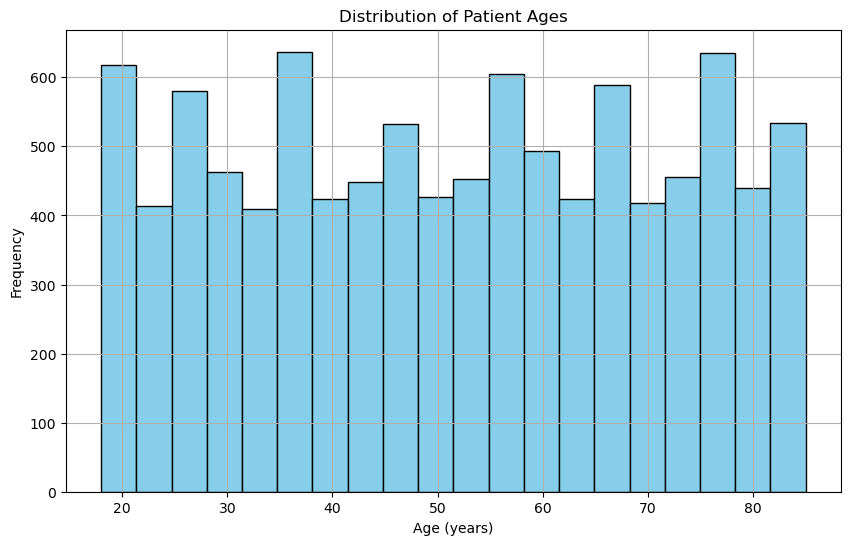

In [13]:
# Visualisasi distribusi usia pasien
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

Dari histogram diatas menunjukan distribusi umur pasien, dari umur 20 tahun hingga lebih dari 80 tahun.

2. Objective: Menampilkan proporsi pasien berdasarkan jenis kelamin.

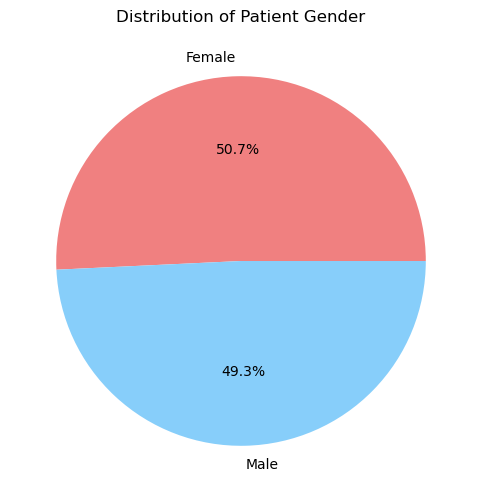

In [14]:
# Visualisasi proporsi jenis kelamin pasien
plt.figure(figsize=(8, 6))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Patient Gender')
plt.ylabel('')
plt.show()

Dari pie chart diatas menunjukan bahwa pasien wanita (50.7%) sedikit lebih banyak dibanding pasien laki-laki (49.3%).

3. Objective: Menampilkan distribusi golongan darah pasien

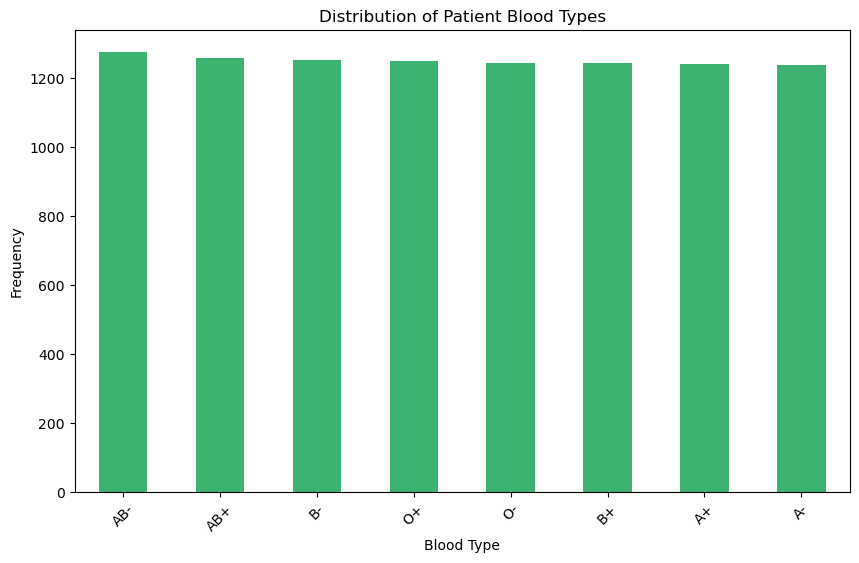

In [15]:
# Visualisasi distribusi golongan darah pasien
plt.figure(figsize=(10, 6))
df['blood_type'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Patient Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Dari bar chart diatas menunjukan distribusi macam-macam golongan darah pasien terbagi secara rata.

4. Objective: Memahami jenis kondisi medis utama pasien yang dirawat.

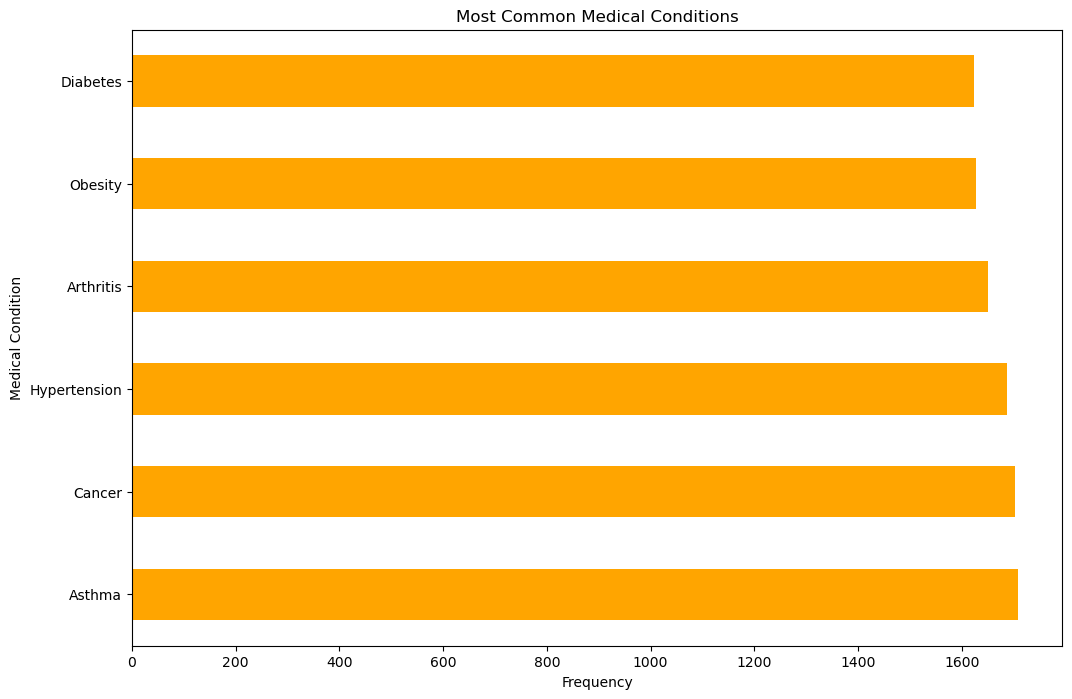

In [16]:
# Visualisasi jenis kondisi medis utama
plt.figure(figsize=(12, 8))
df['medical_condition'].value_counts().plot(kind='barh', color='orange')
plt.title('Most Common Medical Conditions')
plt.xlabel('Frequency')
plt.ylabel('Medical Condition')
plt.show()

Dari bar chart diatas menunjukan bahwa pasien yang memiliki penyakit asma dan kanker paling banyak, dan pasien yang memiliki penyakit diabetes dan obesitas paling sedikit.

5. Objective: Menampilkan distribusi tipe penerimaan pasien ke fasilitas kesehatan.

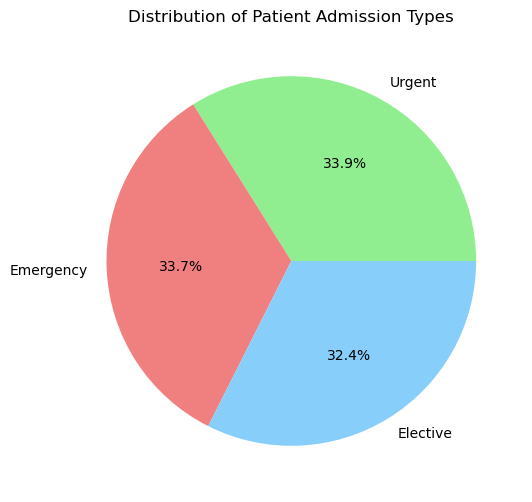

In [17]:
# Visualisasi tipe penerimaan pasien
plt.figure(figsize=(8, 6))
df['admission_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Patient Admission Types')
plt.ylabel('')
plt.show()

Dari pie chart diatas menunjukan distribusi jenis penerimaan pasien. pasien emergency (33.7%), pasien urgent (33.9%), dan pasien elective (32.4%).

6. Objective: Menampilkan penyedia asuransi yang paling umum di antara pasien yang dirawat.

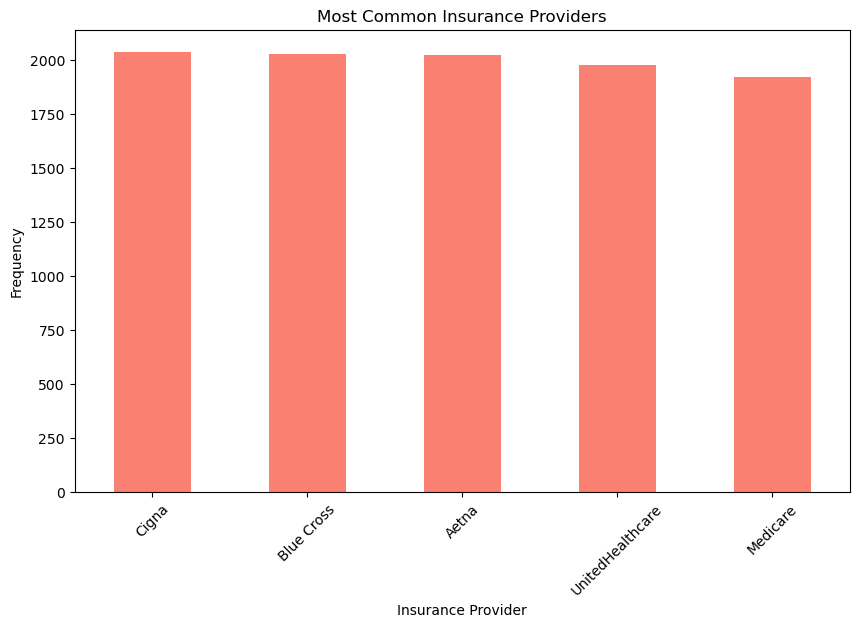

In [18]:
# Visualisasi penyedia asuransi pasien
plt.figure(figsize=(10, 6))
df['insurance_provider'].value_counts().plot(kind='bar', color='salmon')
plt.title('Most Common Insurance Providers')
plt.xlabel('Insurance Provider')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Dari bar chart diatas menunjukan bahwa asuransi yang paling banyak digunakan oleh pasien yaitu cigma dan blue cross, sedangkan asuransi yang paling sedikit penggunanya yaitu mediacare.

7. Objective: Menampilkan distribusi Test results (Variabel target).

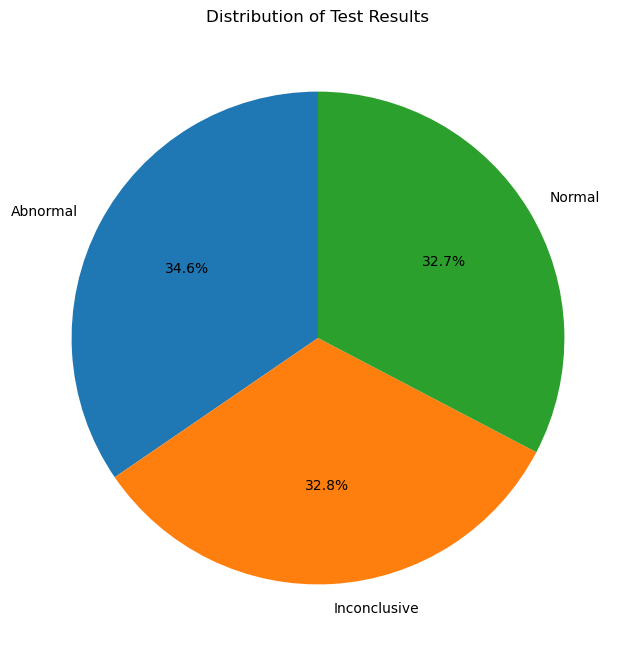

In [19]:
# Menghitung persentase masing-masing kelas
class_counts = df['test_results'].value_counts(normalize=True) * 100

# Visualisasi persentase kelas target menggunakan pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Test Results')
plt.show()

Dari pie chart diatas menunjukan hasil test pasien yang normal sebanyak 32.7%, pasien yang abnormal 34.6%, dan pasien yang inclonclusive sebanyak 32.8%.

# v. Feature Engineering

Pada proses feature engineering saya akan melakukan membagi antara fitur `X(Variabel)` dan fitur `y(Target)`, split `Train-set` dan `Test-set`, `handling outlier`, `handling missing value`, `check cardinality`, dan `label encoder`.

### Split Between `X` (Features/Variables) and `y` (Target/Label)

Saya memilih `Test Results` menjadi variabel dependen, lalu memasukan variabel selain Test Results sebagai variabel independen.

In [20]:
# Drop test result pada X
X= df.drop('test_results', axis=1)

# Masukan test result pada y
y = df['test_results']

In [21]:
# Cek kolom variable
X.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,admission_type,medication,length_of_stay
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,24


In [22]:
# Cek kolom target
y.head()

0    Inconclusive
1          Normal
2          Normal
3        Abnormal
4          Normal
Name: test_results, dtype: object

### Split Between Train-set and Test-set

Setelah dipisahkan menjadi fitur X dan y akan dibagi lagi menjadi `Train-set` dan `Test-set` dengan pembagian Train-set 70% dan Test-set 30%.

In [23]:
# Splitting between train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 26, stratify=y)

# Print Test set and Train set size
print('X Train size : ', X_train.shape)
print('X Test size : ', X_test.shape)
print('y Train size : ', y_train.shape)
print('y Test size : ', y_test.shape)

X Train size :  (7000, 9)
X Test size :  (3000, 9)
y Train size :  (7000,)
y Test size :  (3000,)


In [24]:
# Cek kolom X_train
X_train.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,admission_type,medication,length_of_stay
7222,70,Male,A-,Hypertension,Medicare,12138.412636,Urgent,Paracetamol,28
2747,54,Female,AB-,Obesity,Cigna,20841.542773,Elective,Aspirin,28
1488,27,Female,AB-,Cancer,Aetna,7198.770967,Urgent,Aspirin,9
906,52,Male,A+,Diabetes,Blue Cross,35954.786568,Urgent,Paracetamol,26
2083,26,Male,O+,Asthma,Aetna,3027.821796,Emergency,Penicillin,28


In [25]:
# Cek kolom X_test
X_test.head()

,age,gender,blood_type,medical_condition,insurance_provider,billing_amount,admission_type,medication,length_of_stay
4301,19,Male,B-,Arthritis,Cigna,14628.001672,Urgent,Penicillin,10
1906,39,Female,A-,Obesity,UnitedHealthcare,9854.047809,Emergency,Penicillin,27
520,51,Male,O-,Asthma,Cigna,23147.662039,Emergency,Lipitor,3
8529,66,Male,AB-,Obesity,Cigna,28519.892769,Urgent,Penicillin,15
1901,54,Female,AB+,Arthritis,Medicare,21757.650788,Elective,Paracetamol,16


Setelah itu saya akan memisahkan categorical dan numerical pada kolom X_train untuk dilakukan handling outlier.

In [26]:
# Split kolom numerical dan categorical
cat_col = X_train.select_dtypes(include='object').columns.tolist()
num_col = X_train.select_dtypes(exclude='object').columns.tolist()

In [27]:
# Cek varibel pada kategorical kolom
cat_col

['gender',
 'blood_type',
 'medical_condition',
 'insurance_provider',
 'admission_type',
 'medication']

In [28]:
# Cek varibel pada numerikal kolom
num_col

['age', 'billing_amount', 'length_of_stay']

### Handling Outlier

Lalu saya akan melakukan handling outlier pada X_train untuk melihat apakah ada data yang tidak sesuai dengan data yang seharusnya.

In [29]:
# Inisialisasi daftar untuk menampung fitur dengan tingkat skewness
normal = []
skew = []
extreme_skew = []

# Iterasi melalui fitur numerik
for i in num_col:
    # Menghitung skewness dari setiap fitur
    skewness = X_train[i].skew()
    # Memisahkan fitur berdasarkan tingkat skewness
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <=1:
        skew.append(i)
    elif skewness < 1 or skewness > 1:
        extreme_skew.append(i)

# Menampilkan hasil klasifikasi fitur berdasarkan skewness
print('normal:', normal)
print('skew:', skew)
print('extreme skew:', extreme_skew)

normal: ['age', 'billing_amount', 'length_of_stay']
skew: []
extreme skew: []


Dari hasil pengecekan hanya terdapat nilai normal dan tidak terdapat nilai skew atau extreme skew.

Setelah itu saya akan melakukan drop pada nilai normal.

In [30]:
# Menghapus outlier pada dataset dengan metode normal (z-score)
def drop_outliers_normal(df, normal):
    for col in normal:
        avg = df[col].mean()
        std = df[col].std()
        upper_limit =  avg + 3 * std
        lower_limit = avg - 3 * std
        df.drop(df[(df[col] > upper_limit) | (df[col] < lower_limit)].index, inplace=True)

# Menghilangkan outlier dengan metode normal pada fitur-fitur tertentu
drop_outliers_normal(X_train, ['age', 'billing_amount', 'length_of_stay'])

### Missing Value Handling

Pada proses ini saya hanya mengecek missing value karena tidak terdapat missing value.

In [31]:
# Cek missing value X_train
X_train.isnull().sum()

age                   0
gender                0
blood_type            0
medical_condition     0
insurance_provider    0
billing_amount        0
admission_type        0
medication            0
length_of_stay        0
dtype: int64

In [32]:
# Cek missing value X_test
X_test.isnull().sum()

age                   0
gender                0
blood_type            0
medical_condition     0
insurance_provider    0
billing_amount        0
admission_type        0
medication            0
length_of_stay        0
dtype: int64

In [33]:
# Cek missing value y_train
y_train.isnull().sum()

0

In [34]:
# Cek missing value y_test
y_test.isnull().sum()

0

### Feature Selection

Pada proses ini saya akan mengecek korelasi pada variabel independen terhadap variabel dependen untuk melakukan feature selection.

In [35]:
# Menggabungkan data pelatihan (fitur dan target)
combined_train_data = pd.concat([X_train, y_train], axis=1)
combined_train_data.phik_matrix()['test_results']

interval columns not set, guessing: ['age', 'billing_amount', 'length_of_stay']


age                   0.000000
gender                0.009195
blood_type            0.000000
medical_condition     0.000000
insurance_provider    0.000000
billing_amount        0.000000
admission_type        0.000000
medication            0.019159
length_of_stay        0.031031
test_results          1.000000
Name: test_results, dtype: float64

Dikarenakan korelasinya sangat kecil, saya asumsikan untuk memakai semua feature.

### Check Cardinality

Pada proses ini saya akan melakukan cardinality check dengan melihat apakah data yang dimiliki kategori nominal atau kategori ordinal pada kolom kategori.

In [36]:
X_train[cat_col].nunique()

gender                2
blood_type            8
medical_condition     6
insurance_provider    5
admission_type        3
medication            5
dtype: int64

Dari hasil cek nilai unique value tidak ada variabel yang berpotensi kategori ordinal.

### Encode Variabel Target

Saya akan melakukan label encoding pada target, dikarenakan terget yang ada pada data merupakan kategorikal sehingga harus dilakukan encoding.

In [37]:
# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Melakukan label encoding pada variabel target
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [38]:
# Melihat value yang telah di encode
classes = encoder.classes_
classes

array(['Abnormal', 'Inconclusive', 'Normal'], dtype=object)

# vi. Model Definition

Pada model defintion saya akan melakukan `pipeline` dengan tujuan menggabungkan preprocess (encoding & scaling) pada model `Logistic Regression, KNN, SVC, Decision Tree, Random Forest, dan Ada Bost`.

### Pipeline

Disini saya menggunakan `OneHotEncoder` dikarenakan data yang saya miliki category nominal, dan saya menggunakan `StandardScaler` karena data yang saya miliki **balance**.

In [39]:
# Column transformer
preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), cat_col),
    ('numerical', StandardScaler(), num_col)])

preprocessor

ColumnTransformer(transformers=[('categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'blood_type', 'medical_condition',
                                  'insurance_provider', 'admission_type',
                                  'medication']),
                                ('numerical', StandardScaler(),
                                 ['age', 'billing_amount', 'length_of_stay'])])

### Pipeline Logistic Regession

In [40]:
# Membuat pipeline untuk Logistic Regression
pipe_log = make_pipeline(preprocessor, LogisticRegression())

### Pipeline KNN

In [41]:
# Membuat pipeline untuk KNN
pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())

### Pipeline SVC

In [42]:
# Membuat pipeline untuk SVC
pipe_svc = make_pipeline(preprocessor, SVC())

### Pipeline Decision Tree

In [43]:
# Membuat pipeline untuk Decision Tree
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=7))

### Pipeline Random Forest

In [44]:
# Membuat pipeline untuk Random Forest
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=7))

### Pipeline Ada Boost

In [45]:
# Membuat pipeline untuk Ada Boost
pipe_ab = make_pipeline(preprocessor, AdaBoostClassifier())

# vii. Model Training

Pada model trainin saya akan melakukan `cross validation` untuk mencari model terbaik antara Logistic regression, KNN, dan SVM dengan mengunakan parameter `n_splits=5` atau dengan kelipatan 5 dan menggunakan metrik `accuracy` dikarenakan data saya balance.

### Cross Validation

In [46]:
# Inisialisasi StratifiedKFold dengan 5 lipatan
skfold = StratifiedKFold(n_splits=5)

### Cross Validation Logistic Regression

In [47]:
# Melakukan cross validation logistic regression dengan StratifiedKFold dan menghitung skor accuracy
cv_log = cross_val_score(pipe_log, X_train, y_train_encoded, cv=skfold, scoring='accuracy', n_jobs=-1)

### Cross Validation KNN

In [48]:
# Melakukan cross validation knn dengan StratifiedKFold dan menghitung skor accuracy
cv_knn = cross_val_score(pipe_knn, X_train, y_train_encoded, cv=skfold, scoring='accuracy', n_jobs=-1)

### Cross Validation SVC

In [49]:
# Melakukan cross validation svm dengan StratifiedKFold dan menghitung skor accuracy
cv_svc = cross_val_score(pipe_svc, X_train, y_train_encoded, cv=skfold, scoring='accuracy', n_jobs=-1)

### Cross Validation Decision Tree

In [50]:
# Melakukan cross validation decision tree dengan StratifiedKFold dan menghitung skor accuracy
cv_dt = cross_val_score(pipe_dt, X_train, y_train_encoded, cv=skfold, scoring='accuracy', n_jobs=-1)

### Cross Validation Random Forest

In [51]:
# Melakukan cross validation random forest dengan StratifiedKFold dan menghitung skor accuracy
cv_rf = cross_val_score(pipe_rf, X_train, y_train_encoded, cv=skfold, scoring='accuracy', n_jobs=-1)

### Cross Validation Ada Boost

In [52]:
# Melakukan cross validation ada boost dengan StratifiedKFold dan menghitung skor accuracy
cv_ab = cross_val_score(pipe_ab, X_train, y_train_encoded, cv=skfold, scoring='accuracy', n_jobs=-1)

# viii. Model Evaluation

Pada model evaluation saya akan melakukan perbadingan model dengan tujuan untuk menemukan best model antara Logistic regression, KNN, SVM, Decision Tree, Random Forest, dan Ada Boost dengan menggunakan `cross validation`.

In [53]:
# Finding best model on cross_val_score (mean)
name_model = []
cv_score = 0

# Iterating through cross-validation scores and model names
for cv,name in zip([cv_log,cv_svc,cv_knn,cv_dt,cv_rf,cv_ab],
                   ['Logreg','SVC','KNN','DT','RF','AB']):
    print(name)
    print('accuracy - All - Cross Validation', cv)
    print('accuracy - Mean - Cross Validation', cv.mean())
    print('accuracy - STD - Cross Validation', cv.std())
    print('accuracy - Range - Cross Validation', (cv.mean() - cv.std()), '-', (cv.mean() + cv.std()))
    print('-'*50)
     # Comparing the mean cross-validation score with the current best score
    if cv.mean() > cv_score:
        cv_score = cv.mean()
        name_model = name
    else:
        pass


# Displaying the best model and its score
print('Best Model: ', name_model)
print('Best Model Score is ', cv_score)

Logreg
accuracy - All - Cross Validation [0.315      0.32785714 0.35071429 0.34357143 0.32642857]
accuracy - Mean - Cross Validation 0.33271428571428574
accuracy - STD - Cross Validation 0.012796683243747825
accuracy - Range - Cross Validation 0.3199176024705379 - 0.34551096895803357
--------------------------------------------------
SVC
accuracy - All - Cross Validation [0.33357143 0.33571429 0.34428571 0.32357143 0.32928571]
accuracy - Mean - Cross Validation 0.3332857142857143
accuracy - STD - Cross Validation 0.006889803172450002
accuracy - Range - Cross Validation 0.32639591111326427 - 0.3401755174581643
--------------------------------------------------
KNN
accuracy - All - Cross Validation [0.32428571 0.34857143 0.36928571 0.36642857 0.315     ]
accuracy - Mean - Cross Validation 0.34471428571428564
accuracy - STD - Cross Validation 0.02186507792469675
accuracy - Range - Cross Validation 0.32284920778958887 - 0.3665793636389824
--------------------------------------------------


Dari hasil perbadingan antara Logistic regression, KNN, SVM, Decision Tree, Random Forest, dan Ada Boost dengan menggunakan cross validation, best model yang ditemukan adalah `KNN` dengan score **0.34471428571428564**.

In [54]:
# Fit pipeline pada data pelatihan
pipe_knn.fit(X_train,y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'blood_type',
                                                   'medical_condition',
                                                   'insurance_provider',
                                                   'admission_type',
                                                   'medication']),
                                                 ('numerical', StandardScaler(),
                                                  ['age', 'billing_amount',
                                                   'length_of_stay'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### Before Hyperparameter Tuning

Kemudian saya akan mengecek nilai accuracy dari `best model (KNN)` untuk melakukan perbandingan dengan hasil setelah dilakukan proses `Hyperparameter tuning`.

Accuracy - Train Set   :  0.5621428571428572 

Accuracy - Test Set   :  0.32666666666666666 

Confusion Matrix      : 
Confusion Matrix      : 


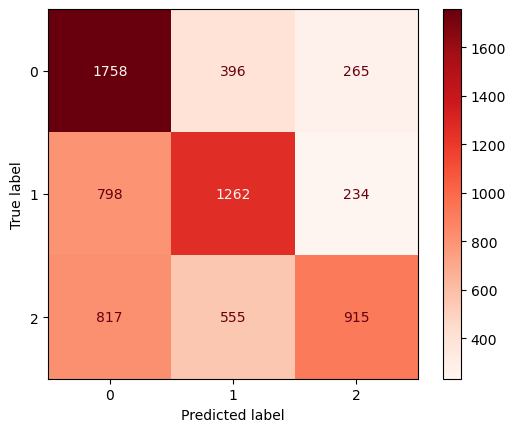

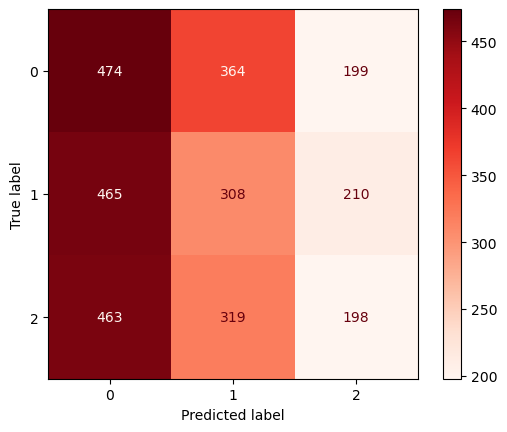

In [55]:
# Lakukan prediksi pada data pelatihan dan data uji
y_pred_train_knn = pipe_knn.predict(X_train)

# Lakukan prediksi pada data pelatihan dan data uji
y_pred_test_knn = pipe_knn.predict(X_test)

# Tampilkan classification report untuk data pelatihan
print('Accuracy - Train Set   : ', accuracy_score(y_train_encoded, y_pred_train_knn), '\n')

# Tampilkan classification report untuk data uji
print('Accuracy - Test Set   : ', accuracy_score(y_test_encoded, y_pred_test_knn), '\n')

# Check Performance Model against Train-Set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_knn, X_train, y_train_encoded, cmap='Reds'))

# Check Performance Model against Test-Set
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_knn, X_test, y_test_encoded, cmap='Reds'))

In [56]:
# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train_encoded, y_pred_train_knn, y_test_encoded, y_pred_test_knn, name):
  score_reports = {
      'train - accuracy_score' : accuracy_score(y_train_encoded, y_pred_train_knn),
      'test - accuracy_score' : accuracy_score(y_test_encoded, y_pred_test_knn),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train_encoded, y_pred_train_knn, y_test_encoded, y_pred_test_knn, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - accuracy_score,0.562143
test - accuracy_score,0.326667


Dari proses diatas dapat dilihat nilai accuracy score sebelum dilakukan Hyperparameter tuning:
- **accuracy Score - Train Set**   :  0.562143 
- **accuracy Score - Test Set**   :  0.326667

### Hyperparameter Tuning

Lalu saya akan melakukan hyperparameter tuning dengan menggunakan `GridSearch` yang bertujuan untuk meningkatkan score dari best model (KNN). 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameter:
{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'} 

Accuracy - Train Set (Best KNN): 0.5304
Accuracy - Test Set (Best KNN): 0.3343


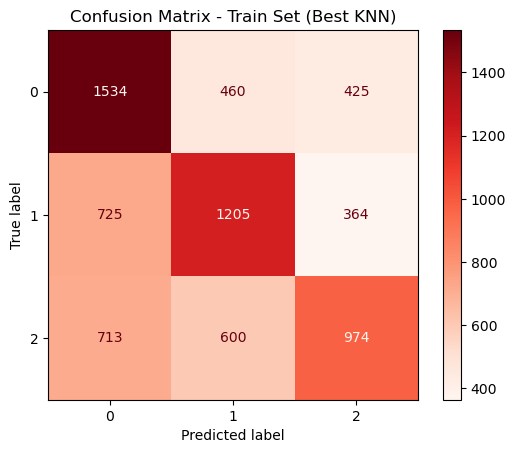

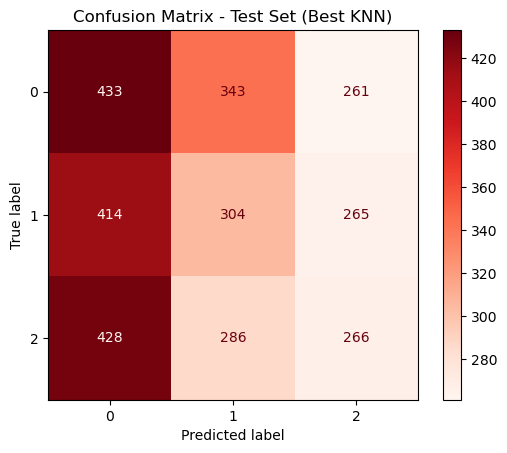

In [57]:
# Daftar hyperparameter yang akan dioptimalkan
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  # Coba beberapa nilai untuk n_neighbors
    'kneighborsclassifier__weights': ['uniform', 'distance'],  # Metode pembobotan tetangga
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']  # Pilihan metrik jarak
}

# Inisialisasi GridSearchCV untuk pencarian parameter terbaik
grid_search = GridSearchCV(pipe_knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Lakukan grid search untuk mencari kombinasi parameter terbaik
grid_search.fit(X_train, y_train_encoded)

# Dapatkan parameter terbaik setelah grid search selesai
best_params = grid_search.best_params_
print("Best Parameter:")
print(best_params, '\n')

# Prediksi menggunakan model dengan parameter terbaik
best_knn = grid_search.best_estimator_

# Prediksi menggunakan model terbaik pada data pelatihan dan data uji
y_pred_train_best = best_knn.predict(X_train)
y_pred_test_best = best_knn.predict(X_test)

# Evaluasi performa menggunakan model terbaik pada data pelatihan dan data uji
print('Accuracy - Train Set (Best KNN): {:.4f}'.format(accuracy_score(y_train_encoded, y_pred_train_best)))
print('Accuracy - Test Set (Best KNN): {:.4f}'.format(accuracy_score(y_test_encoded, y_pred_test_best)))

# Check Performance Model against Train-Set
cm_train = confusion_matrix(y_train_encoded, y_pred_train_best)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=best_knn.classes_)
disp_train.plot(cmap='Reds', values_format='d', ax=None)
plt.title('Confusion Matrix - Train Set (Best KNN)')
plt.show()

# Check Performance Model against Test-Set
cm_test = confusion_matrix(y_test_encoded, y_pred_test_best)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=best_knn.classes_)
disp_test.plot(cmap='Reds', values_format='d', ax=None)
plt.title('Confusion Matrix - Test Set (Best KNN)')
plt.show()

In [58]:
# Save Classification Report into a Dictionary
all_reports = performance_report(all_reports, y_train_encoded, y_pred_train_best, y_test_encoded, y_pred_test_best, 'GridSearchCV')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),GridSearchCV
train - accuracy_score,0.562143,0.530429
test - accuracy_score,0.326667,0.334333


Setelah melakukan proses Hyperparameter tuning nilai accuracy score menjadi:
- **accuracy Score - Train Set (Best Logistic Regression)**  :  0.530429
- **accuracy Score - Test Set (Best Logistic Regression)**   :  0.334333

Dan best parameternya yaitu:
- **'kneighborsclassifier__metric': 'manhattan'**
- **'kneighborsclassifier__n_neighbors': 7**
- **'kneighborsclassifier__weights': 'uniform'**

Dari proses sebelum dan sesudah Hyperparameter tuning dapat disimpulkan bahwa mengalami kenaikan score pada accuracy score sebesar:
- **Train set** : - 0.03171399999999991
- **Test set** : 0.007666000000000006

Model memiliki train accuracy yang tinggi (0.562143 sebelum tuning) tetapi test accuracy yang rendah (0.326667 sebelum tuning), maka hal ini dapat menunjukkan adanya overfitting. Meskipun setelah tuning, terdapat penurunan train accuracy (0.530429) dan peningkatan sedikit pada test accuracy (0.334333), model masih cenderung overfit.

# ix. Model Saving

Selanjutnya saya akan menyimpan best model untuk dilakukan model inference.

In [59]:
# Save the files
with open ('best_knn.pkl', 'wb') as file_1: # wb = write binary
    pickle.dump(best_knn, file_1)

# x. Model Inference

Penjelasan ada di notebook (`P1M2_Alfarabi_inf.ipynb`)

# xi. Overall Analysis

Contoh kriteria analisa yang baik diantaranya adalah: 

1. Dalam konteks dataset kesehatan, interpretasi metrik akurasi (accuracy) sangat penting untuk memahami sejauh mana model dapat memprediksi dengan benar. Jika nilai akurasi tinggi, ini menunjukkan kemampuan model yang baik dalam mengklasifikasikan kondisi atau hasil tes dengan benar. Namun, nilai akurasi rendah dapat menunjukkan bahwa model tidak efektif dalam melakukan prediksi. Penting untuk memperhatikan bahwa interpretasi akurasi harus disesuaikan dengan kasus spesifik yang dihadapi. Selain itu, analisis confusion matrix juga diperlukan untuk memahami di mana model cenderung melakukan kesalahan. Overfitting atau underfitting juga bisa terjadi, yang mempengaruhi performa model pada data pelatihan dan pengujian. Evaluasi yang komprehensif melibatkan metrik-metrik lain seperti presisi, recall, dan F1-score untuk mendapatkan gambaran lengkap tentang performa model dalam konteks dataset kesehatan.

2. Kelebihan dan Kekurangan Model KNN:

    **Kelebihan**:
    - Non-Parametrik: Tidak membuat asumsi tertentu tentang distribusi data.
    - Sederhana untuk Dipahami: Konsepnya intuitif; prediksi dilakukan berdasarkan mayoritas tetangga terdekat.
    - Kemungkinan Menangani Non-linieritas: KNN dapat menangani hubungan non-linier antara fitur dan target.

    **Kekurangan**:
    - Kinerja Lambat pada Data Besar: Proses prediksi KNN dapat menjadi lambat jika jumlah data atau jumlah fitur besar.
    - Sensitif terhadap Skala: KNN sangat sensitif terhadap skala data; memerlukan normalisasi data sebelumnya.
    - Memori yang Diperlukan Besar: KNN menyimpan seluruh dataset dalam memori, yang dapat menjadi masalah pada dataset besar.
    - Kesulitan Menangani Fitur Berkualitas Rendah: KNN dapat memberikan hasil yang buruk jika terdapat banyak fitur yang tidak relevan atau berkualitas rendah.

    **Evaluasi Hyperparameter Tuning**:
    Setelah Hyperparameter tuning, terdapat perbaikan dalam performa model KNN. Namun, perbedaan antara train accuracy dan test accuracy yang signifikan setelah tuning (meskipun sedikit berkurang) menunjukkan adanya indikasi overfitting.

    **Rekomendasi**:
    Mencoba mengubah parameter lain seperti metrik jarak (distance metrics) atau jenis pembobotan (weights) untuk melihat apakah dapat meningkatkan performa pada data uji.

    **Kesimpulan**:
    Meskipun terdapat peningkatan performa setelah tuning, perlu dilakukan penyesuaian lebih lanjut untuk mengatasi overfitting dan meningkatkan generalisasi model pada data yang belum pernah dilihat sebelumnya. Evaluasi lebih lanjut terhadap fitur-fitur yang digunakan juga penting untuk meningkatkan kualitas prediksi.

3. Untuk meningkatkan performa model KNN dengan menemukan kombinasi parameter yang optimal. Berikut adalah langkah-langkah yang diambil:

- **Grid Search untuk Hyperparameter:**
    - Mendefinisikan kumpulan hyperparameter (param_grid) yang akan dioptimalkan, termasuk jumlah tetangga (n_neighbors), metode pembobotan tetangga (weights), dan metrik jarak (metric).
    - GridSearchCV digunakan untuk mencari kombinasi parameter terbaik dari param_grid menggunakan validasi silang (cross-validation) dengan jumlah lipatan (folds) 5 (cv=5).
    - Metrik evaluasi yang digunakan adalah akurasi (scoring='accuracy').
- **Prediksi Menggunakan Model Terbaik:**
    - Setelah proses GridSearchCV selesai, saya mendapatkan parameter terbaik (best_params) dan model terbaik (best_knn) dari hasil pencarian grid.
    - saya kemudian menggunakan model terbaik untuk membuat prediksi pada data pelatihan (X_train) dan data uji (X_test).
- **Evaluasi Performa:**
    - Mencetak akurasi model terbaik pada data pelatihan dan data uji menggunakan accuracy_score.
    - Selain akurasi, saya juga melakukan visualisasi matriks konfusi untuk melihat seberapa baik model bekerja dalam mengklasifikasikan setiap kelas.

4. **Insight EDA**:
- Umur pasien dalam data berikisar dari umur 20 tahun hingga lebih dari 80 tahun lebih.
- Pasien wanita (50.7%) sedikit lebih banyak dibanding pasien laki-laki (49.3%).
- Berdasarkan data golongan darah pasien terbagi secara rata.
- Pasien yang memiliki penyakit asma dan kanker paling banyak, dan pasien yang memiliki penyakit diabetes dan obesitas paling sedikit.
- Pasien emergency (33.7%), pasien urgent (33.9%), dan pasien elective (32.4%).
- Asuransi yang paling banyak digunakan oleh pasien yaitu cigma dan blue cross, sedangkan asuransi yang paling sedikit penggunanya yaitu mediacare.
- Hasil test pasien yang normal sebanyak 32.7%, pasien yang abnormal 34.6%, dan pasien yang inclonclusive sebanyak 32.8%.

# xii. Conceptual Problem

1. **Bagging** (Bootstrap Aggregating) adalah sebuah teknik dalam machine learning yang digunakan untuk mengatasi masalah varians tinggi dan overfitting pada model prediksi. Teknik ini bekerja dengan cara melakukan sampling bootstrap (pengambilan sampel acak dengan penggantian) dari dataset yang ada untuk melatih beberapa model pembelajaran mesin secara independen. Kemudian, model-model ini digabungkan untuk menghasilkan prediksi akhir dengan menggunakan teknik agregasi seperti voting (untuk klasifikasi) atau rata-rata (untuk regresi). Bagging bertujuan untuk meningkatkan kinerja dan stabilitas model ensemble, sehingga menghasilkan prediksi yang lebih konsisten dan akurat pada data baru, sambil mengurangi risiko overfitting terhadap data pelatihan. Oleh karena itu, bagging menjadi salah satu teknik yang efektif dalam membangun model prediktif yang lebih kuat dan dapat diandalkan dalam berbagai aplikasi machine learning.

2. Perbedaan antara algoritma Random Forest dan AdaBoost dapat dirangkum sebagai berikut:

**Cara Membangun Model:**
- **Random Forest**: Menggunakan teknik ensemble dengan banyak pohon keputusan (decision tree) yang dibangun secara independen menggunakan subset acak dari fitur dan data pelatihan. Prediksi akhir diperoleh dengan menggabungkan hasil prediksi dari semua pohon.
- **AdaBoost**: Menggunakan teknik ensemble dengan serangkaian pohon keputusan yang dibangun secara berurutan. Setiap pohon fokus pada memperbaiki kesalahan prediksi yang dilakukan oleh model sebelumnya dengan memberikan bobot yang lebih tinggi pada instance data yang salah diprediksi.

**Penanganan Kesalahan Prediksi:**
- **Random Forest**: Tidak fokus pada mengidentifikasi dan memperbaiki instance data yang sulit diprediksi. Setiap pohon keputusan dibangun secara independen dengan subset data acak.
- **AdaBoost**: Lebih fokus pada mengidentifikasi instance data yang sulit diprediksi. Pohon keputusan berikutnya diberi fokus pada memperbaiki kesalahan yang dilakukan oleh model sebelumnya.

**Sensitivitas terhadap Overfitting:**
- **Random Forest**: Tidak terlalu rentan terhadap overfitting karena setiap pohon dilatih secara independen dengan sampel data yang berbeda.
- **AdaBoost**: Rentan terhadap overfitting jika tidak diatur dengan baik, karena setiap iterasi berfokus pada memperbaiki kesalahan sebelumnya.

**Kompleksitas Implementasi:**
- **Random Forest**: Lebih mudah diimplementasikan dan membutuhkan sedikit tuning parameter.
- **AdaBoost**: Lebih kompleks untuk diimplementasikan dan memerlukan tuning parameter yang lebih hati-hati.

3. **Cross Validation** adalah teknik penting dalam machine learning yang digunakan untuk mengukur kinerja model secara objektif dan menghindari overfitting. Dalam cross validation, dataset dibagi menjadi beberapa subset (fold) yang saling bersinggungan, di mana setiap subset bergantian digunakan sebagai data pengujian (testing) dan data pelatihan (training) untuk melatih dan menguji model. Proses ini diulang beberapa kali (biasanya k kali di mana k adalah jumlah fold) sehingga setiap bagian dari dataset digunakan sebagai data pengujian. Tujuan utama dari cross validation adalah untuk memastikan bahwa model dapat menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya, dan memberikan estimasi performa yang lebih objektif. Dengan menggunakan teknik ini, kita dapat menghindari overfitting dan memastikan bahwa model dapat diandalkan pada data baru yang berbeda. Cross validation sangat penting dalam pengembangan model machine learning untuk mendapatkan estimasi performa yang akurat dan konsisten.